In [1]:
import pandas as pd
import numpy as np
import glob, sys, os, time , itertools , warnings , re
from bs4 import BeautifulSoup
from tqdm import tqdm
import matplotlib.pyplot as plt
import multiprocessing as mp
# from DataProcessing import 
import uszipcode , pickle 
from TempFolder.TempFolder import Temp

warnings.filterwarnings('ignore')

In [2]:
with open('nogit\\path','r') as f:
    path_to_csv = f.read()
path_to_processed_csv =path_to_csv + 'SC-csv\\'
Temp.set_path(path_to_csv +'SC-temp\\')
path_to_temp_csv = path_to_csv+'SC-working-folder\\'
colummn_names = ['Description'
                 ,'Title State/Type'
                 ,'Location'
                 ,'null'
                 ,'Auction Date'
                 ,'Actual Cash Value'
                 ,'Repair Cost'
                 ,'Odometer'
                 ,'Prim Damage'
                 ,'Sec Damage'
                 ,'Price Sold or Highest Bid']
path_to_makes = glob.glob(path_to_csv+'Cars\\*')
search = uszipcode.SearchEngine(simple_zipcode=True)
path_to_all_years = list(itertools.chain.from_iterable([glob.glob(path+'\\*') for path in path_to_makes]))
search = uszipcode.SearchEngine(simple_zipcode=True)



In [3]:
# #%%time
# '''
# Parse the HTML files
# '''

# #
# #Read and parse scraped .html files 
# def process_files(path_to_years__):
#     res_df = pd.DataFrame()
#     #for each make/year folder get a list of all .html files
#     #for path_to__year in tqdm(path_to_years__):
#     for path_to__year in path_to_years__:
#         try:
#             #list of all html
#             path_to_make_years = glob.glob(path_to__year+'/*')

#             #for each .html in the folder
#             for file_path in path_to_make_years:
#             #file_path = path_to_make_years[0]
            
#                 #read file and load to the BS object
#                 with open(file_path, 'r') as f:
#                     fle = f.read()
#                 soup = BeautifulSoup(fle)

#                 rows = []
#                 line_ind = 0 
                
#                 #filter all div elements (div table)
#                 for div in soup.find_all('div',['row']):
#                     row = div.text.strip()
#                     #print(row)
#                     try:
#                         line_dict = {}
#                         i = 0
                        
#                         #clean each element and map to respected column
#                         for line in row.replace('\t','').replace('\xa0','').split('\n'):
#                             line_dict[colummn_names[i]]= line.replace('Location:','').replace('Title State/Type:','').strip()
#                             i+=1
#                         rows.append(line_dict)
#                     except Exception as e:
#                         #print(line_ind,'-',e)
#                         pass
#                     finally:
#                         line_ind+=1

#                 page_df = pd.DataFrame(rows).iloc[3:,:-1]
#                 page_df_ext = page_df.join(page_df['Description'].str.split(' ',expand=True).rename(columns={0:'Year',1:'Make',2:'Model',3:'Model 2',4:'Model 3'}))
#                 page_df_ext = page_df_ext.join(page_df_ext['Location'].str.split('-',expand=True).rename(columns={0:'State',1:'City'}))
#                 page_df_ext['City'] = page_df_ext['City'].str.strip().str.capitalize()
#                 page_df_ext['State'] = page_df_ext['State'].str.strip()
#                 res_df = res_df.append(page_df_ext,ignore_index=True,sort=False)
#                 del rows , page_df_ext , page_df
#         except:
#             continue
#     return res_df


# if __name__ == '__main__':
#     print('# files to concat' , len(path_to_all_years))
#     NCPU = mp.cpu_count()
#     print('Creating pool with ', NCPU,' CPUs')
#     pool = mp.Pool(processes=4)
#     # if not os.path.exists(path_to_processed_csv):
#     #     print('Creating output folder')
#     #     os.makedirs(path_to_processed_csv)
    
#     by_chunk_path_to_all_years = np.array_split(path_to_all_years,len(path_to_all_years) // NCPU )
#     start_ = 0
#     end_ = len(by_chunk_path_to_all_years)
#     for i in range(start_,end_):
#         print('Starting with chunk: ',i,' of ',end_)
#         path_to_all_years_split = np.array_split(by_chunk_path_to_all_years[i],NCPU)
#         ress = pool.map(process_files,path_to_all_years_split)
#         ress_df = pd.concat(ress)
#         print('Chunk ',i,' is done.')
#         ress_df.to_csv(path_to_processed_csv+'sc_'+str(i)+'.csv',index=False)
# #         i+=1
# #         if i ==2:
# #             break
#     pool.close()
#     pool.join()
#     print('all work is done')
    

In [4]:
#Read parsed files
outputs = glob.glob(path_to_processed_csv+'*')
out_l = []
errs = []
for output in tqdm(outputs):
    try:
#     print(output)
        out_l.append(pd.read_csv(output))
    except:
        errs.append(output)
out_df = pd.concat(out_l,ignore_index=True,sort=False)

if len(errs) >0:
    print('Errors:', errs)

100%|██████████| 321/321 [00:12<00:00, 26.23it/s]
Errors: ['c:\\data\\Datasets\\SC-csv\\sc_0.csv', 'c:\\data\\Datasets\\SC-csv\\sc_1.csv', 'c:\\data\\Datasets\\SC-csv\\sc_2.csv', 'c:\\data\\Datasets\\SC-csv\\sc_3.csv', 'c:\\data\\Datasets\\SC-csv\\sc_4.csv', 'c:\\data\\Datasets\\SC-csv\\sc_5.csv', 'c:\\data\\Datasets\\SC-csv\\sc_6.csv', 'c:\\data\\Datasets\\SC-csv\\sc_7.csv']


In [5]:
print(out_df.columns)

row_size = out_df.shape[0]

print('Raw dataset size: ',row_size)


out_df.head(50)


Index(['Actual Cash Value', 'Auction Date', 'Description', 'Location',
       'Odometer', 'Price Sold or Highest Bid', 'Prim Damage', 'Repair Cost',
       'Sec Damage', 'Title State/Type', 'Year', 'Make', 'Model', 'Model 2',
       'State', 'City', 'Model 3', '2', '5'],
      dtype='object')
Raw dataset size:  1048104


Actual Cash Value Auction Date            Description  \
0        $ 5,649 USD   10/02/2019  1992 Acura INTEGRA GS   
1                NaN   06/18/2019  1992 Acura INTEGRA LS   
2                NaN   05/24/2019    1992 Acura VIGOR GS   
3          $ 725 USD   11/26/2018  1992 Acura INTEGRA GS   
4        $ 1,450 USD   09/12/2018  1992 Acura INTEGRA LS   
5        $ 3,250 USD   12/20/2017    1992 Acura VIGOR GS   
6                NaN   12/08/2016    1992 Acura LEGEND L   
7        $ 1,960 USD   09/13/2016  1992 Acura INTEGRA LS   
8                NaN   07/25/2016   1992 Acura LEGEND LS   
9                NaN   07/19/2016    1992 Acura LEGEND L   
10               NaN   07/13/2016    1992 Acura LEGEND L   
11    $ 1,803.74 USD   05/18/2015    1992 Acura LEGEND L   
12               NaN   02/20/2015    1992 Acura LEGEND L   
13       $ 4,950 USD   11/10/2014  1992 Acura INTEGRA LS   
14               NaN   08/08/2014    1992 Acura LEGEND L   
15       $ 2,000 USD   07/01/2014   1992 Acura LEGEND LS   
16       $ 3,000 USD   07/01/2014    1992 Acura LEGEND L   
17               NaN   04/29/2014    1992 Acura VIGOR GS   
18       $ 2,000 USD   01/07/2014    1992 Acura LEGEND L   
19       $ 5,500 USD   12/12/2013  1992 Acura INTEGRA LS   
20               NaN   11/15/2013    1992 Acura LEGEND L   
21      $ 38,000 USD   11/12/2013         1992 Acura NSX   
22       $ 2,995 USD   10/04/2013    1992 Acura LEGEND L   
23       $ 1,900 USD   08/06/2013  1992 Acura INTEGRA GS   
24       $ 4,200 USD   06/19/2013    1992 Acura LEGEND L   
25       $ 3,500 USD   04/23/2013   1992 Acura LEGEND LS   
26               NaN   03/26/2013   1992 Acura LEGEND LS   
27               NaN   03/13/2013    1992 Acura LEGEND L   
28       $ 4,000 USD   02/25/2013   1992 Acura LEGEND LS   
29               NaN   12/04/2012  1992 Acura INTEGRA GS   
30       $ 2,500 USD   11/02/2012      1992 Acura LEGEND   
31       $ 2,500 USD   10/02/2012  1992 Acura INTEGRA LS   
32       $ 3,500 USD   08/27/2012  1992 Acura INTEGRA GS   
33       $ 4,000 USD   07/09/2012   1992 Acura LEGEND LS   
34      $ 28,500 USD   06/26/2012         1992 Acura NSX   
35       $ 3,375 USD   10/03/2019    1993 Acura LEGEND L   
36      $ 47,403 USD   10/02/2019         1993 Acura NSX   
37               NaN   09/30/2019   1993 Acura LEGEND LS   
38               NaN   09/23/2019  1993 Acura INTEGRA GS   
39       $ 1,583 USD   03/21/2019  1993 Acura INTEGRA RS   
40       $ 2,043 USD   01/22/2019    1993 Acura VIGOR GS   
41         $ 625 USD   07/25/2018  1993 Acura INTEGRA LS   
42       $ 3,375 USD   07/10/2018    1993 Acura LEGEND L   
43       $ 2,790 USD   05/30/2018     1993 Acura INTEGRA   
44       $ 1,100 USD   01/19/2018   1993 Acura LEGEND LS   
45       $ 3,183 USD   02/07/2017  1993 Acura INTEGRA LS   
46       $ 1,500 USD   11/21/2016    1993 Acura LEGEND L   
47               NaN   08/30/2016    1993 Acura LEGEND L   
48       $ 2,792 USD   08/03/2016    1993 Acura LEGEND L   
49         $ 750 USD   05/17/2016    1993 Acura LEGEND L   

                  Location  Odometer Price Sold or Highest Bid  \
0      KY - LEXINGTON WEST  146073 A               $ 3,750 USD   
1            CA - SAN JOSE  182250 E                 $ 300 USD   
2          NJ - SOMERVILLE  188301 A                 $ 575 USD   
3       WA - NORTH SEATTLE  300930 E                 $ 325 USD   
4         NY - LONG ISLAND  260216 E                 $ 300 USD   
5            CA - MARTINEZ  205852 E                 $ 175 USD   
6         MN - MINNEAPOLIS  144195 E                 $ 125 USD   
7           TN - KNOXVILLE  309149 E                 $ 975 USD   
8           MD - BALTIMORE  104173 A                 $ 150 USD   
9      NJ - GLASSBORO EAST  131385 A                 $ 200 USD   
10           CA - MARTINEZ  168702 A                 $ 500 USD   
11      FL - MIAMI CENTRAL  233596 A                 $ 425 USD   
12          MO - ST. LOUIS  142905 E                 $ 575 USD   
13            AZ -

In [6]:


# out_df = out_df.join(out_df['Location'].str.split('-',expand=True).rename(columns={0:'State',1:'City'}))

out_df['City'] = out_df['City'].str.strip().str.capitalize()
out_df['State'] = out_df['State'].str.strip().str.upper()
out_df['Model'] = out_df['Model'].astype('str') + ' '+out_df['Model 2'].astype('str').fillna('') + ' ' + out_df['Model 3'].fillna('').astype('str')

out_df.head(20)

Actual Cash Value Auction Date            Description             Location  \
0        $ 5,649 USD   10/02/2019  1992 Acura INTEGRA GS  KY - LEXINGTON WEST   
1                NaN   06/18/2019  1992 Acura INTEGRA LS        CA - SAN JOSE   
2                NaN   05/24/2019    1992 Acura VIGOR GS      NJ - SOMERVILLE   
3          $ 725 USD   11/26/2018  1992 Acura INTEGRA GS   WA - NORTH SEATTLE   
4        $ 1,450 USD   09/12/2018  1992 Acura INTEGRA LS     NY - LONG ISLAND   
5        $ 3,250 USD   12/20/2017    1992 Acura VIGOR GS        CA - MARTINEZ   
6                NaN   12/08/2016    1992 Acura LEGEND L     MN - MINNEAPOLIS   
7        $ 1,960 USD   09/13/2016  1992 Acura INTEGRA LS       TN - KNOXVILLE   
8                NaN   07/25/2016   1992 Acura LEGEND LS       MD - BALTIMORE   
9                NaN   07/19/2016    1992 Acura LEGEND L  NJ - GLASSBORO EAST   
10               NaN   07/13/2016    1992 Acura LEGEND L        CA - MARTINEZ   
11    $ 1,803.74 USD   05/18/2015    1992 Acura LEGEND L   FL - MIAMI CENTRAL   
12               NaN   02/20/2015    1992 Acura LEGEND L       MO - ST. LOUIS   
13       $ 4,950 USD   11/10/2014  1992 Acura INTEGRA LS         AZ - PHOENIX   
14               NaN   08/08/2014    1992 Acura LEGEND L         CA - VALLEJO   
15       $ 2,000 USD   07/01/2014   1992 Acura LEGEND LS   GA - ATLANTA SOUTH   
16       $ 3,000 USD   07/01/2014    1992 Acura LEGEND L         VA - HAMPTON   
17               NaN   04/29/2014    1992 Acura VIGOR GS        CA - SAN JOSE   
18       $ 2,000 USD   01/07/2014    1992 Acura LEGEND L      CA - SACRAMENTO   
19       $ 5,500 USD   12/12/2013  1992 Acura INTEGRA LS       NV - LAS VEGAS   

    Odometer Price Sold or Highest Bid           Prim Damage     Repair Cost  \
0   146073 A               $ 3,750 USD             Front end             NaN   
1   182250 E                 $ 300 USD  Minor dent/scratches             NaN   
2   188301 A                 $ 575 USD             Front end             NaN   
3   300930 E                 $ 325 USD             Front end             NaN   
4   260216 E                 $ 300 USD             Front end             NaN   
5   205852 E                 $ 175 USD  Minor dent/scratches             NaN   
6   144195 E                 $ 125 USD            MECHANICAL             NaN   
7   309149 E                 $ 975 USD                  SIDE             NaN   
8   104173 A                 $ 150 USD  MINOR DENT/SCRATCHES             NaN   
9   131385 A                 $ 200 USD           NORMAL WEAR             NaN   
10  168702 A                 $ 500 USD             FRONT END             NaN   
11  233596 A                 $ 425 USD             FRONT END  $ 1,803.74 USD   
12  142905 E                 $ 575 USD  MINOR DENT/SCRATCHES             NaN   
13  178757 A               $ 1,200 USD                  HAIL             NaN   
14  197111 A                 $ 550 USD             FRONT END             NaN   
15  139640 E                 $ 825 USD             FRONT END             NaN   
16  196143 A                 $ 950 USD           NORMAL WEAR             NaN   
17  216614 A                 $ 500 USD            MECHANICAL             NaN   
18  194944 A                 $ 900 USD  MINOR DENTS/SCRATCHE             NaN   
19  223433 E                 $ 500 USD  MINOR DENTS/SCRATCHE             NaN   

     Sec Damage Title State/Type  Year   Make        Model Model 2 State  \
0           NaN            FL RB  1992  Acura  INTEGRA GS       GS    KY   
1           NaN            CA CQ  1992  Acura  INTEGRA LS       LS    CA   
2    Mechanical            NJ CT  1992  Acura    VIGOR GS       GS    NJ   
3    Mechanical            WA CT  1992  Acura  INTEGRA GS       GS    WA   
4           NaN            NY CT  1992  Acura  INTEGRA LS       LS    NY   
5          Side            CA DQ  1992  Acura    VIGOR GS       GS    CA   
6          HAIL            MN CT  1992  Acura    LEGEND L        L    MN   
7           

In [7]:
out_df.groupby('Make')['Year'].count().sort_values(ascending=False)[:60]

Make
Toyota           142641
Honda            108952
Ford              97547
Nissan            90862
Chevrolet         75600
Hyundai           44489
Dodge             41714
BMW               40111
Mercedes-Benz     39617
Jeep              39128
Volkswagen        36164
KIA               29920
Lexus             29696
Chrysler          27465
Subaru            20847
Acura             16863
Audi              15197
Infiniti          15116
Pontiac           14658
Cadillac          13998
GMC               13314
Mitsubishi        12733
Volvo              9654
Lincoln            9611
Saturn             9465
Scion              7642
Land               7369
Mercury            7116
Mini               5623
Jaguar             4818
Porsche            4105
Mazda              2320
Oldsmobile         2144
Saab               2089
Isuzu              1819
Fiat               1388
Hummer             1231
Maserati            774
Plymouth            676
Tesla               634
Smart               577
Bentley    

In [8]:
out_df['Make'] = out_df['Make'].str.strip().str.upper()

out_df.groupby('Make')['Year'].count().sort_values(ascending=False)[:60]

Make
TOYOTA           142682
HONDA            108981
FORD              97579
NISSAN            90895
CHEVROLET         75618
HYUNDAI           44500
DODGE             41729
BMW               40111
MERCEDES-BENZ     39625
JEEP              39140
VOLKSWAGEN        36175
KIA               29920
LEXUS             29700
CHRYSLER          27467
SUBARU            20852
ACURA             16866
AUDI              15199
INFINITI          15120
PONTIAC           14660
CADILLAC          14000
GMC               13314
MITSUBISHI        12738
VOLVO              9658
LINCOLN            9611
SATURN             9467
SCION              7643
LAND               7370
MERCURY            7118
MINI               5626
JAGUAR             4819
PORSCHE            4106
MAZDA              2320
OLDSMOBILE         2145
SAAB               2090
ISUZU              1819
FIAT               1388
HUMMER             1231
MASERATI            774
PLYMOUTH            676
TESLA               634
SMART               577
BENTLEY    

In [9]:
#clean up wrong values 
out_df = out_df.loc[~out_df['Actual Cash Value'].str.contains('Odometer').fillna(False)]
out_df = out_df.loc[~out_df['Year'].str.contains('Make').fillna(False)]
out_df = out_df.loc[~out_df['Year'].str.contains('Model:').fillna(False)]
out_df = out_df.loc[~out_df['Auction Date'].str.contains('Repair Cost').fillna(False)]


#filter out canadian cars
out_df = out_df.loc[~out_df['Price Sold or Highest Bid'].str.contains('CA').fillna(False)
                               ]

out_df['Auction Date'] = pd.to_datetime(out_df['Auction Date'])

out_df['Auction_Year'] = out_df['Auction Date'].dt.year

In [10]:
cleaned_size = out_df.shape[0]
print('Cleaned dataset size:',cleaned_size
      ,'\nRows removed: ', row_size - cleaned_size)


Cleaned dataset size: 1046013 
Rows removed:  2091


In [11]:
# # out_df.to_csv(path_to_processed_csv+'SC-countymap.csv',index=False)

# # out_df = pd.read_csv(path_to_processed_csv+'SC-countymap.csv')

# from DataProcessing.DataStats import get_df_stats

# get_df_stats(out_df)

In [12]:
# Combining Prim Damages 
raw_prim_cat = out_df['Prim Damage'].str.lower().unique()
print('Cat count:',raw_prim_cat.shape[0],'\n',raw_prim_cat)

Cat count: 33 
 ['front end' 'minor dent/scratches' 'mechanical' 'side' 'normal wear'
 'hail' 'minor dents/scratche' 'stripped' 'all over' 'damage history'
 'partial/incomplete r' 'rear end' 'vandalism' 'water/flood' 'burn'
 'previous repair' 'partial repair' 'top/roof' 'rollover'
 'burn - interior' 'undercarriage' 'biohazard/chemical' 'burn - engine'
 'frame damage' 'missing/altered vin' 'unknown' 'frame damage reporte'
 'replaced vin' 'rejected repair' 'biohazardous/chemica' nan
 'cash for clunkers' 'rr']


In [13]:
prim_damage_map = {
 'burn - engine': 'burn'
, 'partial/incomplete r' : 'partial repair'
, 'frame damage reporte' : 'frame damage'

,'unknown' : 'no data'


, np.nan : 'no data'
,'price sold or highest bid' :'no data'
,'rr' : 'no data'

}
out_df['Prim Damage'] = out_df['Prim Damage'].str.lower().replace(prim_damage_map)

In [14]:
new_prim_cat = out_df['Prim Damage'].str.lower().unique()
print('Cat count:',new_prim_cat.shape[0],'\n',new_prim_cat)

Cat count: 28 
 ['front end' 'minor dent/scratches' 'mechanical' 'side' 'normal wear'
 'hail' 'minor dents/scratche' 'stripped' 'all over' 'damage history'
 'partial repair' 'rear end' 'vandalism' 'water/flood' 'burn'
 'previous repair' 'top/roof' 'rollover' 'burn - interior' 'undercarriage'
 'biohazard/chemical' 'frame damage' 'missing/altered vin' 'no data'
 'replaced vin' 'rejected repair' 'biohazardous/chemica'
 'cash for clunkers']


In [15]:
Temp.save_obj(out_df,'out_df' )#140520646600464

Object <2657045810824> saved to: c:\data\Datasets\SC-temp\


In [16]:
out_df = Temp.load_obj('out_df')

Object <out_df> loaded from: c:\data\Datasets\SC-temp\


In [17]:
#fix numerical values
def alter_sting(x):    
    try:
        return float(re.sub('[\$,USD,\, ,E,A,N]','',x))
    except:
#         print(x)
        return np.nan


out_df['Actual Cash Value'] = (out_df['Actual Cash Value']
                               #.fillna(-1)
                               .map(alter_sting))
out_df['Repair Cost'] = (out_df['Repair Cost']
#                          .fillna(-1)
                         .map(alter_sting))

out_df['Price Sold or Highest Bid'] = (out_df['Price Sold or Highest Bid']
                                       #.fillna(-1)
                                       .map(alter_sting))
out_df['Year'] = (out_df['Year']
#                   .fillna(-1)
                  .map(float))

out_df = out_df.rename(columns={'Year':'Model_Year'
                               }
                      ).assign(Model_Year = lambda x: pd.to_datetime(x['Model_Year'].astype(int).astype(str)))



#rename variables - add _ where needed

out_df = out_df.rename({'Price Sold or Highest Bid':'Price_Sold_or_Highest_Bid'
                            ,'Repair Cost':'Repair_Cost'
                            ,'Actual Cash Value':'Actual_Cash_Value'
                            ,'Prim Damage':'Prim_Damage'
                            ,'Sec Damage':'Sec_Damage'
                            ,'Title State/Type':'Title_State_Type'
                            ,'Auction Date':'Auction_Date'
                            },axis=1)


print('New columns names:',out_df.columns)

New columns names: Index(['Actual_Cash_Value', 'Auction_Date', 'Description', 'Location',
       'Odometer', 'Price_Sold_or_Highest_Bid', 'Prim_Damage', 'Repair_Cost',
       'Sec_Damage', 'Title_State_Type', 'Model_Year', 'Make', 'Model',
       'Model 2', 'State', 'City', 'Model 3', '2', '5', 'Auction_Year'],
      dtype='object')


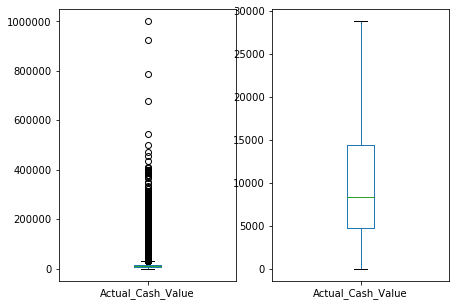

In [18]:
#explore outlyers for 
fig, ax = plt.subplots(1,2,figsize=(7,5))
out_df['Actual_Cash_Value'].plot.box(ax=ax[0])
out_df['Actual_Cash_Value'].plot.box(ax=ax[1],showfliers =False)



Counts:
#>100k: 987


8500.0    7167
8400.0    5106
5000.0    4209
4000.0    3652
3000.0    3561
2500.0    3505
2000.0    3294
6000.0    2947
3500.0    2888
4500.0    2832
Name: Actual_Cash_Value, dtype: int64

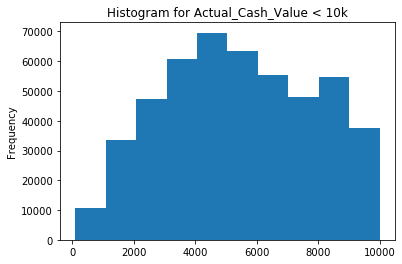

In [19]:

#display modes of the distribution 
filterd_acv = out_df['Actual_Cash_Value'].loc[out_df['Actual_Cash_Value'] <1e4]

print('Counts:\n#>100k:'
                ,len(out_df['Actual_Cash_Value'].loc[out_df['Actual_Cash_Value']>=1e5])
            
)

n = 10
filterd_acv_round = (filterd_acv // n ) * n


#plot a histogram of observed cash_values
fig= plt.figure()
ax = filterd_acv.plot.hist()
ax.set(title = 'Histogram for Actual_Cash_Value < 10k');



#print modes 
filterd_acv_round.value_counts().iloc[:10]

K-S p-value: 0.0


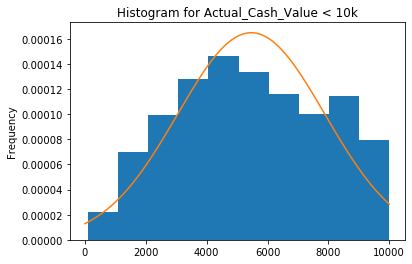

In [20]:
#fit  normat distribution

from scipy import stats

x = np.linspace(0,filterd_acv.max(),len(filterd_acv))
mu , std = stats.norm.fit(filterd_acv.values)

ax = filterd_acv.plot.hist(normed=True)
plt.plot(x, stats.norm.pdf(x , mu, std))
ax.set(title = 'Histogram for Actual_Cash_Value < 10k');
print('K-S p-value:', stats.kstest(filterd_acv.values , 'norm')[1])

In [70]:
#format odometer data

#for null model - replace all E  & N values into "No Data" (np.nan)

def odometer_null(x):
    if 'E' in x or 'N' in x:
        return np.nan
    else:
        return alter_sting(x)


    
#create a dictionary for max E value for each model 

odometr_dict = (out_df.loc[out_df['Odometer'].str.contains('A')]
                 .assign(odometer_num = lambda x: x['Odometer'].map(alter_sting)
                        )
                 .groupby('Description')['odometer_num']
                 .max()
                #  [['Odometer','odometer_num']]
                )

#replace E and N values into max of A category
def odometer_replace(x):
    if 'E' in x['Odometer'] or 'N' in x['Odometer']:
        try:
            return odometr_dict[x['Description']]
        except:
            return np.nan
    else:
        return alter_sting(x['Odometer'])


#create null model
out_df = out_df.assign(Odometer_Null = lambda x: x['Odometer'].map(odometer_null))

#create replace model:

out_df = out_df.assign(Odometer_Replace = lambda x: x.apply(odometer_replace,axis=1))


# create Model_Age
# current_year = 2019
out_df['Model_Age'] = (out_df['Auction_Date'] - out_df['Model_Year'] ).dt.days // 365 + 1

In [71]:

out_df['Model_Age'].describe().astype(int)

count    1046013
mean          10
std            6
min            0
25%            6
50%           10
75%           14
max           95
Name: Model_Age, dtype: int32

In [63]:
#check model age statsВ

out_df.loc[out_df['Model_Age'].loc[out_df['Model_Age']<0].index]

Actual_Cash_Value Auction_Date            Description  \
40335              42333.0   2012-12-31          2013 Acura TL   
40336              51456.0   2012-12-28         2013 Acura MDX   
40337              29250.0   2012-11-13  2013 Acura ILX 20 PRE   
40738              64544.0   2013-12-23    2014 Acura MDX TECH   
40739              60150.0   2013-11-18    2014 Acura RLX TECH   
...                    ...          ...                    ...   
1044079            14627.0   2015-12-01  2016 Nissan VERSA S/S   
1044080            36690.0   2015-11-27     2016 Nissan MAXIMA   
1044081            15896.0   2015-11-19  2016 Nissan VERSA S/S   
1044082            33478.0   2015-11-19     2016 Nissan MAXIMA   
1044083            16109.0   2015-10-19  2016 Nissan VERSA S/S   

                   Location Odometer  Price_Sold_or_Highest_Bid  Prim_Damage  \
40335      CA - LOS ANGELES      1 N                    20000.0  water/flood   
40336          TX - HOUSTON      2 N                    31500.0  water/flood   
40337      LA - BATON ROUGE    786 A                    11000.0    front end   
40738      CA - LOS ANGELES   3853 A                    18000.0    front end   
40739      CA - LOS ANGELES   4419 A                    30000.0     rear end   
...                     ...      ...                        ...          ...   
1044079  FL - MIAMI CENTRAL   5011 A                     4000.0    front end   
1044080      MO - ST. LOUIS      0 N                     5000.0   mechanical   
1044081         CA - FRESNO   4319 A                     5200.0    front end   
1044082       NY - NEWBURGH   2997 A                    11000.0    front end   
1044083        AZ - PHOENIX   3220 A                     3000.0     all over   

         Repair_Cost                 Sec_Damage Title_State_Type  ... Model 2  \
40335            NaN                NORMAL WEAR            NY FS  ...     NaN   
40336            NaN                        NaN            NY FS  ...     NaN   
40337       10880.00                       SIDE            IL SC  ...      20   
40738       28566.00  PARTIAL/INCOMPLETE REPAIR            TX SV  ...    TECH   
40739       18411.00                        NaN            WA BS  ...    TECH   
...              ...                        ...              ...  ...     ...   
1044079          NaN                   REAR END            GA ST  ...     S/S   
1044080     14522.00                  FRONT END            MO SC  ...     NaN   
1044081          NaN                        NaN            CA SC  ...     S/S   
1044082          NaN                        NaN            MD CT  ...     NaN   
1044083     21202.16                        NaN            NV CT  ...     S/S   

        State         City Model 3    2    5 Auction_Year Odometer_Null  \
40335      CA  Los angeles     NaN  NaN  NaN         2012           NaN   
40336      TX      Houston     NaN  NaN  NaN         2012           NaN   
40337      LA  Baton rouge     PRE  NaN  NaN         2012         786.0   
40738      CA  Los angeles     NaN  NaN  NaN         2013        3853.0   
40739      CA  Los angeles     NaN  NaN  NaN         2013        4419.0   
...       ...          ...     ...  ...  ...          ...           ...   
1044079   NaN          NaN     NaN  NaN  NaN         2015        5011.0   
1044080   NaN          NaN     NaN  NaN  NaN         2015           NaN   
1044081   NaN          NaN     NaN  NaN  NaN         2015        4319.0   
1044082   NaN          NaN     NaN  NaN  NaN         2015        2997.0   
1044083   NaN          NaN     NaN  NaN  NaN         2015        3220.0   

        Odometer_Replace  Model_Age  
40335           156688.0         -1  
40336           116672.0         -4  
40337              786.0        -49  
40738             3853.0         -9  
40739             4419.0        -44  
...                  ...        ...  
1044079           5011.0        -31  
1044080          54585.0        -35  
1044081           4319.0        -43  
1

In [21]:

numerical_fields =  ['Actual_Cash_Value'
               # 'Auction_Date',
       #'Odometer'
       , 'Price_Sold_or_Highest_Bid', 'Repair_Cost',
        'Odometer_Null','Odometer_Replace'
        ,'Model_Age'
        ]

categorical_variables = ['Prim_Damage','Make','Model'
]


In [57]:
#categories for all categorical variables 

# categorial_variables = ['Prim_Damage'
#                         ,'Sec_Damage'
#                         ,'Make'
#                         ,'Model' # - to many categories >2000
#
                        #  ]  
out_df[categorical_variables]  =out_df[categorical_variables].astype('category')

print(out_df[categorical_variables].describe().to_string(),'\n\n')

cat_df = {}
for col in categorical_variables:
    print(col, ' - ', out_df[col].cat.categories.tolist(),'\n')
    cat_df[col] = out_df[col].cat.categories.tolist()


/SX ', 'RIO S ', 'RIO nan ', 'RIO/LX/SX nan ', 'RIO5 nan ', 'RIVIERA GS ', 'RL nan ', 'RLX ADVANC ', 'RLX ADVANCE ', 'RLX SPORT ', 'RLX TECH ', 'RLX TECH-A ', 'RLX nan ', 'RM 2500 CC', 'ROADRUNNER nan ', 'ROADSTAR nan ', 'ROADSTER nan ', 'ROCKET 88 ', 'RODEO S ', 'RODEO S/LS ', 'RODEO SPOR ', 'RODEO SPORT ', 'RODEO nan ', 'ROGUE S ', 'ROGUE S/SL ', 'ROGUE S/SV ', 'ROGUE SELE ', 'ROGUE SL ', 'ROGUE SPORT ', 'ROGUE SV ', 'ROGUE nan ', 'RONDO BASE ', 'RONDO LX ', 'RONDO LX/E ', 'RONDO nan ', 'RONDO/LX/E nan ', 'ROUTAN S ', 'ROUTAN SE ', 'ROUTAN SEL ', 'ROUTAN nan ', 'ROVER RANGE ROVER', 'ROYAL nan ', 'ROYALE nan ', 'ROYCE nan ', 'RS4 QUATTR ', 'RS4 QUATTRO ', 'RS4 nan ', 'RS5 QUATTR ', 'RS5 QUATTRO ', 'RS5 nan ', 'RS6 nan ', 'RS7 PRESTIGE ', 'RS7 nan ', 'RSX TYPE-S ', 'RSX nan ', 'RV nan ', 'RX 300 ', 'RX 330 ', 'RX 350 ', 'RX 350 BASE', 'RX 350 L', 'RX 400 ', 'RX 400 HYB', 'RX 400 HYBRID', 'RX 400H ', 'RX 450 ', 'RX 450H ', 'RX 450H L', 'RX nan ', 'RX300 nan ', 'RX330 nan ', 'RX350 nan '

In [58]:
# out_df = Temp.load_obj('140505604672312')
# Temp.save_obj(out_df,'out_df')

In [59]:
out_df[numerical_fields].describe(percentiles =[.01,.25, .5, .75,.99])

Actual_Cash_Value  Price_Sold_or_Highest_Bid   Repair_Cost  \
count      819535.000000               1.046013e+06  3.790310e+05   
mean        11536.592956               3.394154e+03  1.061105e+04   
std         11700.020399               6.108664e+03  1.944676e+04   
min           100.000000               0.000000e+00  1.000000e-02   
1%           1000.000000               2.000000e+02  1.000000e+03   
25%          4852.000000               8.500000e+02  6.062000e+03   
50%          8432.000000               1.800000e+03  9.211000e+03   
75%         14431.000000               3.850000e+03  1.314700e+04   
99%         53329.240000               2.360000e+04  3.348280e+04   
max       1000000.000000               2.000000e+06  9.999999e+06   

       Odometer_Null  Odometer_Replace     Model_Age  
count   6.551730e+05      1.036359e+06  1.046013e+06  
mean    1.095685e+05      1.811846e+05  3.617740e+03  
std     7.158170e+04      1.919098e+05  2.261436e+03  
min     0.000000e+00      0.000000e+00 -2.100000e+02  
1%      1.865720e+03      3.108000e+03  2.500000e+02  
25%     5.372100e+04      8.040000e+04  1.956000e+03  
50%     1.057970e+05      1.508860e+05  3.585000e+03  
75%     1.555570e+05      2.511740e+05  4.874000e+03  
99%     2.888426e+05      5.453260e+05  1.056500e+04  
max     9.600091e+06      9.600091e+06  3.454600e+04

In [51]:
#Correlation Analysis
out_df[numerical_fields].corr()

Actual_Cash_Value  Price_Sold_or_Highest_Bid  \
Actual_Cash_Value                   1.000000                   0.764365   
Price_Sold_or_Highest_Bid           0.764365                   1.000000   
Repair_Cost                         0.235118                   0.143551   
Odometer_Null                      -0.515170                  -0.320186   
Odometer_Replace                   -0.282774                  -0.185632   

                           Repair_Cost  Odometer_Null  Odometer_Replace  
Actual_Cash_Value             0.235118      -0.515170         -0.282774  
Price_Sold_or_Highest_Bid     0.143551      -0.320186         -0.185632  
Repair_Cost                   1.000000      -0.141348         -0.079974  
Odometer_Null                -0.141348       1.000000          1.000000  
Odometer_Replace             -0.079974       1.000000          1.000000

In [49]:
numerical_fields_bins = {'Actual_Cash_Value' : [],
'Price_Sold_or_Highest_Bid': [],
'Repair_Cost': [],
'Odometer_Null': [],
'Odometer_Replace': [],
'Model_Age': }

['Actual_Cash_Value',
 'Price_Sold_or_Highest_Bid',
 'Repair_Cost',
 'Odometer_Null',
 'Odometer_Replace',
 'Model_Age']

Actual_Cash_Value
1021.0                  1
9235.0                  1
1935.0                  1
1179.0                  1
2313.0                  1
...                   ...
48.0                 7973
40.0                 8025
84.0                 8623
50.0                 8655
85.0                10721

[1578 rows x 1 columns]
        Price_Sold_or_Highest_Bid
855.0                           1
2440.0                          1
1810.0                          1
865.0                           1
3490.0                          1
...                           ...
6.0                         40083
7.0                         41020
8.0                         42700
9.0                         43258
5.0                         44596

[522 rows x 1 columns]
        Repair_Cost
568.0             1
1264.0            1
1446.0            1
8342.0            1
1424.0            1
...             ...
65.0           3286
70.0           3339
50.0           3357
80.0           3372
100.0          3587

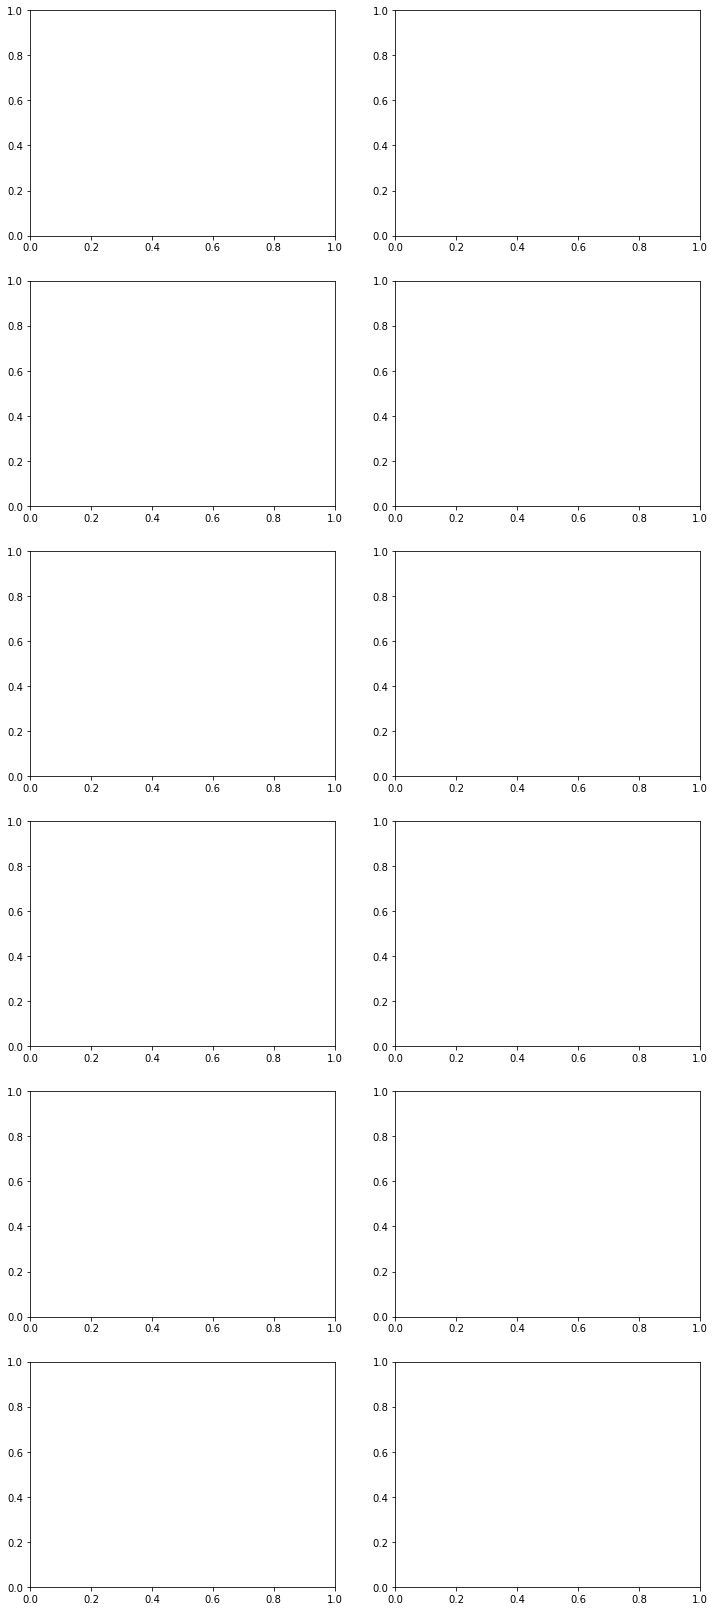

In [58]:
#histomgram for conitnuous variables
fig , axs = plt.subplots(len(numerical_fields) ,2, figsize=(12,29),sharex=False)


i=0
for var in numerical_fields:
    # hist_df_lb ,hist_df_hb = out_df[var].loc[lambda x: x <=3e4] , out_df[var].loc[lambda x: x >=1e4]
    df_to_print = (out_df[var] // 100).value_counts().to_frame().sort_values(by=var)
    df_to_print.to_csv(f'csv/{var}_hist.csv')
    print(df_to_print)
    # hist_df_lb.plot.hist(bins=10, ax= axs[i][0])
    # hist_df_hb.plot.hist(bins=10, ax= axs[i][1])
    
    # axs[i][0].set(title = var + ' <100k bin')
    # axs[i][1].set(title = var + ' >100k bin')
    i+=1

In [26]:
out_df[categorical_variables]

from DataProcessing.DataStats import get_df_stats

get_df_stats(out_df[categorical_variables])

Feature  Unique_values  Percentage of missing values  \
0  Prim_Damage             28                           0.0   
1         Make             61                           0.0   
2        Model           5553                           0.0   

   Percentage of values in the biggest category     dtype  
0                                     41.495469  category  
1                                     13.622010  category  
2                                      1.605143  category

In [27]:
out_df.columns

Index(['Actual_Cash_Value', 'Auction_Date', 'Description', 'Location',
       'Odometer', 'Price_Sold_or_Highest_Bid', 'Prim_Damage', 'Repair_Cost',
       'Sec_Damage', 'Title_State_Type', 'Model_Year', 'Make', 'Model',
       'Model 2', 'State', 'City', 'Model 3', '2', '5', 'Auction_Year',
       'Odometer_Null', 'Odometer_Replace', 'Model_Age'],
      dtype='object')

In [28]:
#value distribution for Description 

desc_val_dist = out_df['Description'].value_counts()

desc_val_dist[:30]

2015 Nissan ALTIMA 2.5     2216
2008 Nissan ALTIMA 2.5     2062
2013 Nissan ALTIMA 2.5     1880
2003 Honda ACCORD EX       1801
2003 Toyota COROLLA CE     1777
2009 Nissan ALTIMA 2.5     1763
2007 Toyota CAMRY NEW      1722
2002 Toyota CAMRY LE/X     1706
2005 Toyota COROLLA CE     1686
2014 Ford FOCUS SE         1623
2006 Toyota COROLLA CE     1620
2004 Honda ACCORD EX       1585
2012 Honda CIVIC LX        1580
2013 Hyundai ELANTRA GL    1558
2014 Nissan ALTIMA 2.5     1474
2002 Toyota CAMRY LE       1434
2002 Ford EXPLORER X       1427
2003 Toyota CAMRY LE/X     1425
2005 Nissan ALTIMA S/S     1389
2012 Nissan ALTIMA 2.5     1388
2004 Toyota COROLLA CE     1381
2007 Toyota PRIUS          1376
2007 Nissan ALTIMA 2.5     1374
2007 Toyota COROLLA CE     1359
2007 Toyota CAMRY CE/L     1358
2005 Toyota PRIUS          1286
2008 Toyota PRIUS          1286
2008 Honda CIVIC LX        1254
2004 Ford EXPLORER X       1222
2003 Toyota CAMRY LE       1221
Name: Description, dtype: int64

In [29]:
#value distribution for Prim Damage 

prim_val_dist = out_df['Prim_Damage'].value_counts()

prim_val_dist[:30]

front end               434048
rear end                103914
mechanical              103634
minor dent/scratches     93381
side                     91479
normal wear              51918
water/flood              32590
all over                 32560
minor dents/scratche     24845
hail                     12041
rollover                 11996
damage history           11709
undercarriage             8624
partial repair            8282
vandalism                 6097
frame damage              4996
burn                      3890
top/roof                  3552
stripped                  2985
biohazard/chemical        1390
burn - interior            903
previous repair            386
rejected repair            345
biohazardous/chemica       150
missing/altered vin        114
no data                     92
replaced vin                91
cash for clunkers            1
Name: Prim_Damage, dtype: int64

In [38]:
#summary statistics conditions on Prim_Damage

cond_on_primd = out_df.groupby('Prim_Damage').agg(['mean','var']).stack().sort_index(level=1)
cond_on_primd.index = ['{} - {}'.format(j, i) for i, j in cond_on_primd.index]
cond_on_primd

Actual_Cash_Value  Price_Sold_or_Highest_Bid  \
mean - all over                   1.469950e+04               3.521528e+03   
mean - biohazard/chemical         9.221682e+03               1.834730e+03   
mean - biohazardous/chemica       1.393287e+04               2.655833e+03   
mean - burn                       1.126854e+04               2.244645e+03   
mean - burn - interior            1.148300e+04               3.016833e+03   
mean - cash for clunkers                   NaN               7.000000e+02   
mean - damage history             1.699361e+04               7.621507e+03   
mean - frame damage               1.190855e+04               4.207191e+03   
mean - front end                  1.238371e+04               3.235141e+03   
mean - hail                       1.003654e+04               3.884383e+03   
mean - mechanical                 5.862624e+03               1.844958e+03   
mean - minor dent/scratches       6.475869e+03               2.766341e+03   
mean - minor dents/scratche       9.550760e+03               3.894250e+03   
mean - missing/altered vin        1.933312e+04               5.525658e+03   
mean - no data                    1.457636e+04               7.350815e+03   
mean - normal wear                1.066775e+04               4.706321e+03   
mean - partial repair             2.129268e+04               8.842943e+03   
mean - previous repair            1.936653e+04               8.684132e+03   
mean - rear end                   1.074744e+04               3.159174e+03   
mean - rejected repair            2.456247e+04               1.126065e+04   
mean - replaced vin               2.003249e+04               8.796978e+03   
mean - rollover                   1.621107e+04               3.341769e+03   
mean - side                       1.156969e+04               3.433219e+03   
mean - stripped                   1.306690e+04               2.855680e+03   
mean - top/roof                   1.118353e+04               3.540704e+03   
mean - undercarriage              1.135039e+04               3.531501e+03   
mean - vandalism                  1.008402e+04               3.144468e+03   
mean - water/flood                1.963998e+04               7.169640e+03   
var - all over                    1.812883e+08               2.881605e+07   
var - biohazard/chemical          7.713911e+07               1.328493e+07   
var - biohazardous/chemica        8.057865e+07               6.671514e+06   
var - burn                        1.499914e+08               3.013388e+08   
var - burn - interior             1.153515e+08               2.315098e+07   
var - damage history              2.740746e+08               8.141030e+07   
var - frame damage                9.354068e+07               2.272121e+07   
var - front end                   1.220762e+08               2.790287e+07   
var - hail                        6.169038e+07               3.289184e+07   
var - mechanical                  3.338825e+07               6.463509e+06   
var - minor dent/scratches        8.974331e+07               2.278667e+07   
var - minor dents/scratche        9.740004e+07               2.825859e+07   
var - missing/altered vin         3.663163e+08               9.867220e+07   
var - no data                     3.596495e+08               1.863562e+08   
var - normal wear                 2.566925e+08               7.192198e+07   
var - partial repair              2.767343e+08               5.220021e+07   
var - previous repair             2.712696e+08               9.232513e+07   
var - rear end                    1.188353e+08               2.157102e+07   
var - rejected repair             5.257239e+08               2.145432e+08   
var - replaced vin                2.672720e+08               9.488608e+07   
var - rollover                    1.442244e+08               2.107014e+07   
var - side                        1.285054e+08               6.863440e+07   
var - stripped                    2.218931e+08               2.467530e+07   
var - top/roof           

In [50]:
#summary statistics conditions on Make

cond_on_make = out_df.groupby('Make').agg(['mean','var']).stack().sort_index(level=1)
cond_on_make.index = ['{} - {}'.format(j, i) for i, j in cond_on_make.index]
cond_on_make.to_csv('csv/temp.csv')

In [49]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cond_on_make)

   
mean - PORSCHE             3.778253e+04               1.501562e+04   
mean - ROLLS-ROYCE         7.702261e+04               3.227089e+04   
mean - SAAB                5.317178e+03               1.227450e+03   
mean - SATURN              4.702614e+03               1.084262e+03   
mean - SCION               7.985007e+03               1.983257e+03   
mean - SEADOO              6.868358e+03               2.635849e+03   
mean - SMART               7.463913e+03               2.384565e+03   
mean - SUBARU              1.201904e+04               2.639109e+03   
mean - TESLA               6.963529e+04               2.761288e+04   
mean - TOYOTA              1.016794e+04               3.456990e+03   
mean - VOLKSWAGEN          9.591125e+03               2.521444e+03   
mean - VOLVO               9.005077e+03               2.160797e+03   
mean - WABASH              1.740867e+04               4.383333e+03   
var - ACURA                9.339004e+07               1.451183e+07   
var - ALFA      

In [97]:
%%time
# i = 6
# city = out_df.loc[i,'City']
# state =out_df.loc[i,'State']
# city, state

# geo_found = search.by_city_and_state(city,state)[0]

# geo_found.county , geo_found.state


def find_county(x):
    try:
        return search.by_city_and_state(x[1] , x[0])[0].county
    except:
        return 'None'


locs = out_df['Location'].unique()
locs = locs[~pd.isnull(locs)]

state_city = [l[:2] for l in  list(map(lambda x: x.split(' - '),   locs ) ) #if len(l)>1
             ]





county = list(map(find_county,   state_city ) )

county = [', '.join([l.strip() for l in (county[i].replace('County','')+', '+state_city[i][0]).split(',') ])
 for i in range(len(county))]

loc_lookup = pd.DataFrame({'Location':locs,'County':county}).set_index('Location')['County']

loc_lookup


def map_countries(x):
    try:
        return loc_lookup.loc[x]
    except:
        return 'None'
        
out_df['County'] = out_df['Location'].map(map_countries)

Wall time: 1min 5s


In [98]:
out_df.head(10)

Actual_Cash_Value Auction_Date            Description             Location  \
0             5649.0   2019-10-02  1992 Acura INTEGRA GS  KY - LEXINGTON WEST   
1                NaN   2019-06-18  1992 Acura INTEGRA LS        CA - SAN JOSE   
2                NaN   2019-05-24    1992 Acura VIGOR GS      NJ - SOMERVILLE   
3              725.0   2018-11-26  1992 Acura INTEGRA GS   WA - NORTH SEATTLE   
4             1450.0   2018-09-12  1992 Acura INTEGRA LS     NY - LONG ISLAND   
5             3250.0   2017-12-20    1992 Acura VIGOR GS        CA - MARTINEZ   
6                NaN   2016-12-08    1992 Acura LEGEND L     MN - MINNEAPOLIS   
7             1960.0   2016-09-13  1992 Acura INTEGRA LS       TN - KNOXVILLE   
8                NaN   2016-07-25   1992 Acura LEGEND LS       MD - BALTIMORE   
9                NaN   2016-07-19    1992 Acura LEGEND L  NJ - GLASSBORO EAST   

   Odometer  Price_Sold_or_Highest_Bid           Prim_Damage  Repair_Cost  \
0  146073 A                     3750.0             front end          NaN   
1  182250 E                      300.0  minor dent/scratches          NaN   
2  188301 A                      575.0             front end          NaN   
3  300930 E                      325.0             front end          NaN   
4  260216 E                      300.0             front end          NaN   
5  205852 E                      175.0  minor dent/scratches          NaN   
6  144195 E                      125.0            mechanical          NaN   
7  309149 E                      975.0                  side          NaN   
8  104173 A                      150.0  minor dent/scratches          NaN   
9  131385 A                      200.0           normal wear          NaN   

    Sec_Damage Title_State_Type  ... State            City Model 3    2    5  \
0          NaN            FL RB  ...    KY  Lexington west     NaN  NaN  NaN   
1          NaN            CA CQ  ...    CA        San jose     NaN  NaN  NaN   
2   Mechanical            NJ CT  ...    NJ      Somerville     NaN  NaN  NaN   
3   Mechanical            WA CT  ...    WA   North seattle     NaN  NaN  NaN   
4          NaN            NY CT  ...    NY     Long island     NaN  NaN  NaN   
5         Side            CA DQ  ...    CA        Martinez     NaN  NaN  NaN   
6         HAIL            MN CT  ...    MN     Minneapolis     NaN  NaN  NaN   
7          NaN            TN CT  ...    TN       Knoxville     NaN  NaN  NaN   
8  NORMAL WEAR            MD CT  ...    MD       Baltimore     NaN  NaN  NaN   
9          NaN            NJ CT  ...    NJ  Glassboro east     NaN  NaN  NaN   

  Auction_Year Odometer_Null Odometer_Replace Model_Age              County  
0         2019      146073.0         146073.0     10136         Fayette, KY  
1         2019           NaN         178757.0     10030     Santa Clara, CA  
2         2019      188301.0         188301.0     10005        Somerset, NJ  
3         2018           NaN         197187.0      9826            King, WA  
4         2018           NaN         178757.0      9751          Queens, NY  
5         2017           NaN         216614.0      9485    Contra Costa, CA  
6         2016           NaN         233596.0      9108        Hennepin, MN  
7         2016           NaN         178757.0      9022            Knox, TN  
8         2016      104173.0         104173.0      8972  Baltimore city, MD  
9         2016      131385.0         131385.0      8966      Gloucester, NJ  

[10 rows x 24 columns]

In [99]:
'''
JOINING WITH DEMOGRAPHIC DATA 
'''



'\nJOINING WITH DEMOGRAPHIC DATA \n'

In [100]:
#read the demography data `

path_to_demograpyh ='c:\\data\\Datasets\\SC-working-folder\\demography.csv'

demog = pd.read_csv(path_to_demograpyh)

In [101]:
print('Demographic features:\n' , demog.columns.tolist())

Demographic features:
 ['index', 'Unemp-Pct-2014', 'Unemp-Pct-2015', 'Unemp-Pct-2016', 'Unemp-Pct-2017', 'Unemp-Pct-2018', 'Unemp-Pct-2013', 'Unemp-Pct-2012', 'Unemp-Pct-2011', 'Unemp-Pct-2010', 'Income_adj-1990', 'Income_adj-1991', 'Income_adj-1992', 'Income_adj-1993', 'Income_adj-1994', 'Income_adj-1995', 'Income_adj-1996', 'Income_adj-1997', 'Income_adj-1998', 'Income_adj-1999', 'Income_adj-2000', 'Income_adj-2001', 'Income_adj-2002', 'Income_adj-2003', 'Income_adj-2004', 'Income_adj-2005', 'Income_adj-2006', 'Income_adj-2007', 'Income_adj-2008', 'Income_adj-2009', 'Income_adj-2010', 'Income_adj-2011', 'Income_adj-2012', 'Income_adj-2013', 'Income_adj-2014', 'Income_adj-2015', 'Income_adj-2016', 'Income_adj-2017', 'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'GRNDTOT', 'CPOPARST']


In [109]:
final_columns = [
'Actual_Cash_Value'
, 'Auction_Date'
,'Price_Sold_or_Highest_Bid'
,'Prim_Damage'
,'Repair_Cost'
,'Sec_Damage'
,'Model_Year'
,'Make'
,'Model'
,'Auction_Year'
,'County'
,'Odometer_Null'
,'Odometer_Replace'
,'Model_Age'
,'Unemp-Pct-2014'
,'Unemp-Pct-2015'
,'Unemp-Pct-2016'
,'Unemp-Pct-2017'
,'Unemp-Pct-2018'
,'Unemp-Pct-2013'
,'Unemp-Pct-2012'
,'Unemp-Pct-2011'
,'Unemp-Pct-2010'
,'Income_adj-1990'
,'Income_adj-1991'
,'Income_adj-1992'
,'Income_adj-1993'
,'Income_adj-1994'
,'Income_adj-1995'
,'Income_adj-1996'
,'Income_adj-1997'
,'Income_adj-1998'
,'Income_adj-1999'
,'Income_adj-2000'
,'Income_adj-2001'
,'Income_adj-2002'
,'Income_adj-2003'
,'Income_adj-2004'
,'Income_adj-2005'
,'Income_adj-2006'
,'Income_adj-2007'
,'Income_adj-2008'
,'Income_adj-2009'
,'Income_adj-2010'
,'Income_adj-2011'
,'Income_adj-2012'
,'Income_adj-2013'
,'Income_adj-2014'
,'Income_adj-2015'
,'Income_adj-2016'
,'Income_adj-2017'
,'CENSUS2010POP'
,'ESTIMATESBASE2010'
,'POPESTIMATE2010'
,'POPESTIMATE2011'
,'POPESTIMATE2012'
,'POPESTIMATE2013'
,'POPESTIMATE2014'
,'POPESTIMATE2015'
,'POPESTIMATE2016'
,'POPESTIMATE2017'
,'POPESTIMATE2018'
,'GRNDTOT'
,'CPOPARST'
       ]

car_demo_joined = (pd.merge(out_df, demog,left_on='County',right_on='index',how='left')
                    [final_columns]
                    )

In [110]:
car_demo_joined.head()

Actual_Cash_Value Auction_Date  Price_Sold_or_Highest_Bid  \
0             5649.0   2019-10-02                     3750.0   
1                NaN   2019-06-18                      300.0   
2                NaN   2019-05-24                      575.0   
3              725.0   2018-11-26                      325.0   
4             1450.0   2018-09-12                      300.0   

            Prim_Damage  Repair_Cost  Sec_Damage Model_Year   Make  \
0             front end          NaN         NaN 1992-01-01  ACURA   
1  minor dent/scratches          NaN         NaN 1992-01-01  ACURA   
2             front end          NaN  Mechanical 1992-01-01  ACURA   
3             front end          NaN  Mechanical 1992-01-01  ACURA   
4             front end          NaN         NaN 1992-01-01  ACURA   

         Model  Auction_Year  ... POPESTIMATE2011  POPESTIMATE2012  \
0  INTEGRA GS           2019  ...        301736.0         306075.0   
1  INTEGRA LS           2019  ...             NaN              NaN   
2    VIGOR GS           2019  ...        326153.0         327341.0   
3  INTEGRA GS           2018  ...       1974084.0        2011323.0   
4  INTEGRA LS           2018  ...       2255559.0        2272745.0   

   POPESTIMATE2013  POPESTIMATE2014  POPESTIMATE2015  POPESTIMATE2016  \
0         310010.0         311955.0         316002.0         319738.0   
1              NaN              NaN              NaN              NaN   
2         329024.0         329342.0         329678.0         329996.0   
3        2047543.0        2085730.0        2126561.0        2166602.0   
4        2288194.0        2300148.0        2307614.0        2309032.0   

   POPESTIMATE2017  POPESTIMATE2018  GRNDTOT   CPOPARST  
0         322193.0         323780.0      NaN        NaN  
1              NaN              NaN      NaN        NaN  
2         330700.0         331164.0   8997.0   327390.0  
3        2204229.0        2233163.0  79704.0  1924983.0  
4        2296865.0        2278906.0      NaN        NaN  

[5 rows x 64 columns]

In [111]:
car_demo_joined['Auction_Date'] = pd.to_datetime(car_demo_joined['Auction_Date'])

Auction_Date
2010       4.038110
2011      20.216170
2012     246.600472
2013     707.368209
2014     888.557840
2015    1139.882282
2016    1415.134848
2017    1475.194229
2018    1918.635877
2019    1938.309284


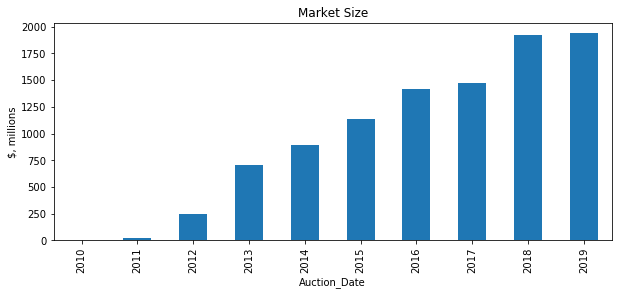

In [112]:
#market size

market_size = car_demo_joined.groupby(car_demo_joined['Auction_Date'].dt.year)['Actual_Cash_Value'].sum()

market_size =  market_size / 1000000

print(market_size.to_string())
plt.figure(figsize=(10,4))
ax = market_size.plot.bar()
ax.set(title='Market Size', ylabel='$, millions');

In [113]:
car_demo_joined.head()

Actual_Cash_Value Auction_Date  Price_Sold_or_Highest_Bid  \
0             5649.0   2019-10-02                     3750.0   
1                NaN   2019-06-18                      300.0   
2                NaN   2019-05-24                      575.0   
3              725.0   2018-11-26                      325.0   
4             1450.0   2018-09-12                      300.0   

            Prim_Damage  Repair_Cost  Sec_Damage Model_Year   Make  \
0             front end          NaN         NaN 1992-01-01  ACURA   
1  minor dent/scratches          NaN         NaN 1992-01-01  ACURA   
2             front end          NaN  Mechanical 1992-01-01  ACURA   
3             front end          NaN  Mechanical 1992-01-01  ACURA   
4             front end          NaN         NaN 1992-01-01  ACURA   

         Model  Auction_Year  ... POPESTIMATE2011  POPESTIMATE2012  \
0  INTEGRA GS           2019  ...        301736.0         306075.0   
1  INTEGRA LS           2019  ...             NaN              NaN   
2    VIGOR GS           2019  ...        326153.0         327341.0   
3  INTEGRA GS           2018  ...       1974084.0        2011323.0   
4  INTEGRA LS           2018  ...       2255559.0        2272745.0   

   POPESTIMATE2013  POPESTIMATE2014  POPESTIMATE2015  POPESTIMATE2016  \
0         310010.0         311955.0         316002.0         319738.0   
1              NaN              NaN              NaN              NaN   
2         329024.0         329342.0         329678.0         329996.0   
3        2047543.0        2085730.0        2126561.0        2166602.0   
4        2288194.0        2300148.0        2307614.0        2309032.0   

   POPESTIMATE2017  POPESTIMATE2018  GRNDTOT   CPOPARST  
0         322193.0         323780.0      NaN        NaN  
1              NaN              NaN      NaN        NaN  
2         330700.0         331164.0   8997.0   327390.0  
3        2204229.0        2233163.0  79704.0  1924983.0  
4        2296865.0        2278906.0      NaN        NaN  

[5 rows x 64 columns]

In [114]:
car_demo_joined.to_csv(path_to_temp_csv+'joint_working_df.csv')

In [115]:
by_couny = (car_demo_joined.reset_index()
             .groupby('County')['index']
             .count().sort_values(ascending=False)
           )

print(by_couny.to_string())

County
Los Angeles, CA                67403
Harris, TX                     44080
Dallas, TX                     36341
Fulton, GA                     36250
Miami-Dade, FL                 34320
Sacramento, CA                 26656
San Bernardino, CA             25785
Suffolk, MA                    23504
Hartford, CT                   23053
Orange, NY                     22838
Contra Costa, CA               22044
Philadelphia, PA               19360
Denver, CO                     19061
Hennepin, MN                   18917
San Diego, CA                  17651
Lake, IL                       16618
Queens, NY                     16395
Fresno, CA                     15012
Allegheny, PA                  14770
Somerset, NJ                   14647
Cook, IL                       14629
Maricopa, AZ                   13197
Marion, IN                     12772
Peoria, IL                     12660
Orange, FL                     11412
Hillsborough, FL               11323
Gloucester, NJ                 

In [0]:
plt.figure()
ax = by_couny[:20].plot.bar()
ax.set(title='Top 20 Counties by # records',ylabel='# observations');

In [0]:
#categories for all categorical variables 
# categorial_variables = ['Prim_Damage'
#                         ,'Sec_Damage'
#                         ,'Make'
#                         ,'Model' # - to many categories >2000
#
                        #  ]  
out_df[categorial_variables]  =out_df[categorial_variables].astype('category')

print(out_df[categorial_variables].describe().to_string(),'\n\n')

cat_df = {}
for col in categorial_variables:
    print(col, ' - ', out_df[col].cat.categories.tolist(),'\n')
    cat_df[col] = out_df[col].cat.categories.tolist()
